<a href="https://colab.research.google.com/github/nuwanc/ml/blob/main/sarimax2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 94029.95300600555


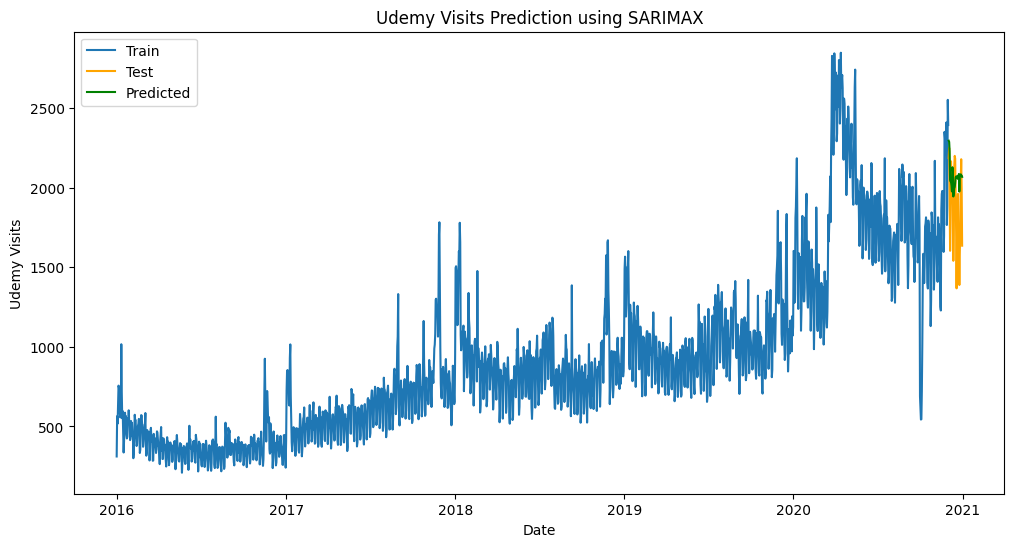

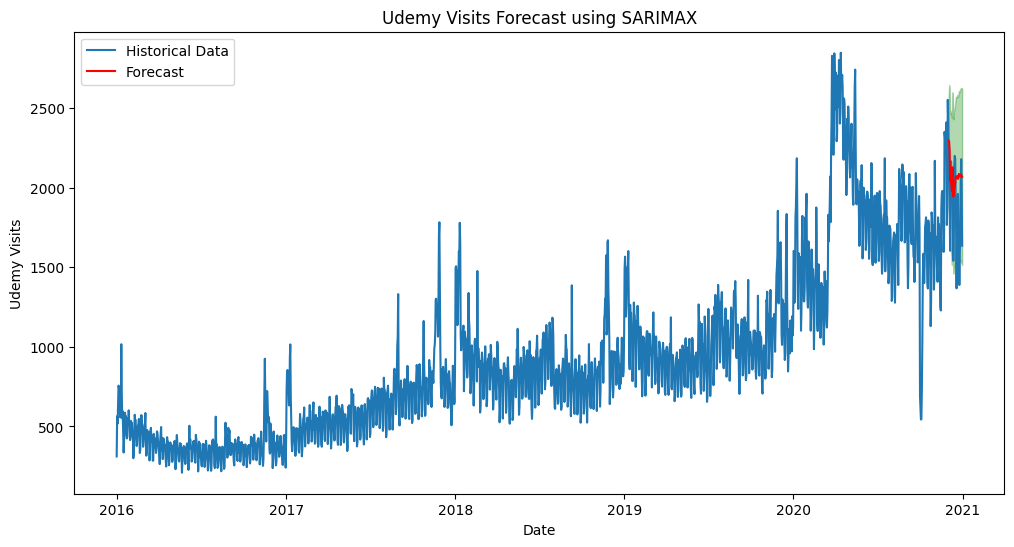

In [5]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the dataset
url = "https://raw.githubusercontent.com/diogoalvesderesende/datasets/Datasets/Udemy_wikipedia_visits.csv"
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Check for missing values
data = data.dropna()

# Split the data into train and test sets
train = data.iloc[:-30]
test = data.iloc[-30:]

# Define the SARIMAX model with yearly seasonality
model = sm.tsa.statespace.SARIMAX(
    train['Udemy'],
    exog=train[['Easter', 'Christmas']],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),  # Change s to 365 for yearly seasonality
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit the model
results = model.fit(disp=False)

# Make predictions
predictions = results.get_prediction(start=test.index[0], end=test.index[-1], exog=test[['Easter', 'Christmas']], dynamic=False)
predicted_mean = predictions.predicted_mean

# Calculate mean squared error
mse = mean_squared_error(test['Udemy'], predicted_mean)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Udemy'], label='Train')
plt.plot(test.index, test['Udemy'], label='Test', color='orange')
plt.plot(predicted_mean.index, predicted_mean, label='Predicted', color='green')
plt.xlabel('Date')
plt.ylabel('Udemy Visits')
plt.title('Udemy Visits Prediction using SARIMAX')
plt.legend()
plt.show()

# Create future exogenous variables (binary indicators for Easter and Christmas)
forecast_steps = 30  # Number of steps to forecast
future_dates = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

future_exog = pd.DataFrame({
    'easter': [0] * forecast_steps,  # Adjust this according to your known future dates for Easter
    'christmas': [0] * forecast_steps  # Adjust this according to your known future dates for Christmas
}, index=future_dates)

forecast = results.get_forecast(steps=forecast_steps, exog=future_exog)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Udemy'], label='Historical Data')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='green', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Udemy Visits')
plt.title('Udemy Visits Forecast using SARIMAX')
plt.legend()
plt.show()
